# Figure 5 

In [6]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.stats as stats
from scipy.interpolate import interp1d
import os
import sys

from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,mark_inset)

area=4.0;linethicknes=1.0;

font = {'family' : 'normal','weight' : 'normal','size'   : 7, 'family':'serif','serif':['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] =linethicknes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42



########################################################################
############# Import code

sys.path.insert(0, './../../DataAndScripts/unstructured_scripts/')
import functions_optimal as fun
import sims_utils as su
import functions_dynamics as fun_dyna

# Load data

In [18]:

#######################################
folder_data='./../../DataAndScripts/experimental_data/'
#######################################

data_monkeys=np.loadtxt(folder_data+'Monkeys_with_trials.txt');
data_mice=np.loadtxt(folder_data+'Mice_with_trials.txt');

data_both_species=[data_mice,data_monkeys]
species=['Mice','Monkeys']
colors=['c','m']

dataset_both_species,Con_both_species,nCon_both_species,normalization_both_species=[],[],[],[]
for idx_species in range(2):
    dataset,Con,nCon=fun.build_dataset(data_both_species[idx_species])
    normalization=1.0;#np.mean(dataset[0,:,0])
    dataset_both_species=dataset_both_species+[dataset]
    Con_both_species=Con_both_species+[Con]
    nCon_both_species=nCon_both_species+[nCon]

# Load simulations from the unstructured model

In [21]:


######
## Load simulations from Unstructured model
######


folder_main='./unstructured/data_files/'

results=np.loadtxt(folder_main+'results.txt');

sim_param_all=results[:,0:15]
moments_of_r_sim_all=results[:,15:20]
sim_convergence_all=results[:,20:24]
sim_decay_all=results[:,26]/results[:,27]
sim_species=results[:,28]
sim_combined=results[:,29]

sim_curr_E=results[:,30]
sim_curr_I=results[:,31]
sim_curr_tot=results[:,32]
sim_curr_opto=results[:,33]


Possible_Tmax_over_tau_E=np.unique(sim_param_all[:,14])
Possible_sigma_Lambda_over_Lambda=np.unique(sim_param_all[:,10])
Possible_r_X=np.unique(sim_param_all[:,12])
Possible_J=np.unique(sim_param_all[:,11])



# Load simulations from structured model


In [14]:

######
## Load simulations from structured model
######

folder_main='./structured/structured_fit_statistics/'



# r, r+delta r, sigma_r, sigma_{r+delta r}, sigma_deltar rho
sim_param_all_mice=np.loadtxt(folder_main+'structured_mouse_preds.txt')
sim_param_all_monkeys=np.loadtxt(folder_main+'structured_monkey_preds.txt')

bal_idx_mice=np.loadtxt(folder_main+'structured_mouse_bals.txt')
bal_idx_monkeys=np.loadtxt(folder_main+'structured_monkey_bals.txt')

opt_idx_mice=np.loadtxt(folder_main+'structured_mouse_optrs.txt')
opt_idx_monkeys=np.loadtxt(folder_main+'structured_monkey_optrs.txt')




# Plot

"\npic_name='Figure_5.pdf'\nfig.savefig(pic_name,format='pdf',bbox_inches='tight', dpi=300)\npic_name='Figure_5.png'\nfig.savefig(pic_name,format='png',bbox_inches='tight', dpi=300)\n "

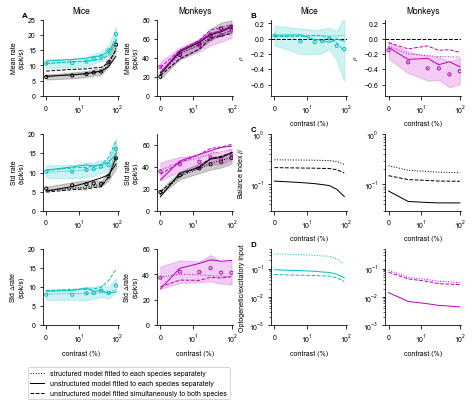

In [19]:
rows=3;cols=4;
fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
area=4.0;linethicknes=1.0;

axs = axs.ravel()
font = {'family' : 'normal','weight' : 'normal','size'   : 7, 'family':'serif','serif':['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] =linethicknes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42


for idx in range(rows*cols):
    axs[idx].spines['top'].set_visible(False)
    axs[idx].spines['right'].set_visible(False)
    
axs[0].text(-.2, 1.1,'A', transform=axs[0].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[2].text(-.2, 1.1,'B', transform=axs[2].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[6].text(-.2, 1.1,'C', transform=axs[6].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[10].text(-.2, 1.1,'D', transform=axs[10].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');

for idx in [8,9,10,11]:
    axs[idx].set_xlabel('contrast (%)')
for idx_species in range(2):
    dataset=dataset_both_species[idx_species]
    Con=Con_both_species[idx_species]
    nCon=nCon_both_species[idx_species]
         
    for idx_moment in range(6):
        if idx_moment<2:
            panel=[axs[0],axs[1]][idx_species]
            ccc=['k',colors[idx_species]][idx_moment]
            ymin=0
            ymax=[25,80][idx_species]
            panel.set_title(['Mice','Monkeys'][idx_species])
            panel.set_ylabel('Mean rate\n(spk/s)')
        if (idx_moment>=2)&(idx_moment<4):
            panel=[axs[4],axs[5]][idx_species]
            ccc=['k',colors[idx_species]][idx_moment-2]
            ymin=0
            #ymax=[20,60][idx_species]
            ymax=[20,70][idx_species]
            panel.set_ylabel('Std rate\n(spk/s)')
         
        if (idx_moment==4):
            panel=[axs[8],axs[9]][idx_species]
            ccc=colors[idx_species]
            ymin=0
            ymax=[20,60][idx_species]
            panel.set_ylabel('Std $\Delta$rate\n(spk/s)')
         
        if (idx_moment==5):
            panel=[axs[2],axs[3]][idx_species]
            panel.set_title(['Mice','Monkeys'][idx_species])
            ccc=colors[idx_species]
            ymin=-0.75
            ymax=0.25
            panel.set_ylabel(r'$\rho$')
                     
        m,sem=dataset[idx_moment,:,0],dataset[idx_moment,:,1]
        panel.scatter(Con,m,facecolors='none', s=10,edgecolors=ccc,marker='o')
        panel.fill_between(Con,m-sem,m+sem,
                                                 color=ccc,alpha=0.2)
    
        panel.set_xscale('symlog', linthresh=12)
        panel.axis([-1.,110,ymin,ymax])
    panel.axhline(y=0,ls='--',c='k')
    panel.set_xlabel('contrast (%)')
    


g_E,g_I=sim_param_all[:,2],sim_param_all[:,3]
sigma_Lambda_over_Lambda,J=sim_param_all[:,10],sim_param_all[:,11]
CV_opto=sigma_Lambda_over_Lambda
for idx_combined in [0,1]:#[0,1]:
    ls=['-','--'][idx_combined]
    for idx_species in [0,1]:
        #print(idx_combined,idx_species)
        dataset=dataset_both_species[idx_species]
        Con=Con_both_species[idx_species]
        nCon=nCon_both_species[idx_species]
            
        mask_cases=(sim_species==idx_species)&(sim_combined==idx_combined)
        data_x=sim_param_all[mask_cases,12]
        cost=0
        for idx_moment in range(6):
            clr=colors[idx_species]

            if idx_moment==0:
                data_y=moments_of_r_sim_all[mask_cases,0]
                panel=[axs[0],axs[1]][idx_species]
                clr='k'
            if idx_moment==1:
                data_y=moments_of_r_sim_all[mask_cases,0]+moments_of_r_sim_all[mask_cases,1]
                panel=[axs[0],axs[1]][idx_species]
            if idx_moment==2:
                data_y=moments_of_r_sim_all[mask_cases,2]
                panel=[axs[4],axs[5]][idx_species]
                clr='k'
            
            if idx_moment==3:
                data_y=np.sqrt(moments_of_r_sim_all[mask_cases,2]**2
                               +moments_of_r_sim_all[mask_cases,3]**2
                               +2*moments_of_r_sim_all[mask_cases,4])
                panel=[axs[4],axs[5]][idx_species]
            if idx_moment==4:
                data_y=moments_of_r_sim_all[mask_cases,3]
                panel=[axs[8],axs[9]][idx_species]

            if idx_moment==5:
                data_y=moments_of_r_sim_all[mask_cases,4]/moments_of_r_sim_all[mask_cases,3]**2
                panel=[axs[2],axs[3]][idx_species]


            data_y_med=np.zeros((len(np.unique(data_x)),3))
            for idx in range(len(np.unique(data_x))):
                mask_x=data_x==np.unique(data_x)[idx]
                data_y_med[idx,0]=np.mean(data_y[mask_x])
                data_y_med[idx,1]=stats.sem(data_y[mask_x])
            #panel.errorbar(Con,data_y_med[:,0],data_y_med[:,1],c=clr,ls=ls) 
            panel.plot(Con,data_y_med[:,0],lw=1,c=clr,ls=ls) 



#sigma_t,tau_rp,g_E,g_I,beta,K,p,CV_K,1,
#Lambda,sigma_Lambda_over_Lambda,J,r_X[idx_r_X],L[idx_L],Tmax_over_tau_E

g_E,g_I=sim_param_all[:,2],sim_param_all[:,3]
sigma_Lambda_over_Lambda,J=sim_param_all[:,10],sim_param_all[:,11]
CV_opto=sigma_Lambda_over_Lambda
for idx_combined in [0,1]:#[0,1]:
    ls=['-','--'][idx_combined]
    for idx_species in [0,1]:
        #print(idx_combined,idx_species)
        dataset=dataset_both_species[idx_species]
        Con=Con_both_species[idx_species]
        nCon=nCon_both_species[idx_species]
            
        mask_cases=(sim_species==idx_species)&(sim_combined==idx_combined)

        data_x=sim_param_all[mask_cases,12]
        cost=0
        for idx_case in range(2):
            clr=colors[idx_species]
            if idx_case==0:
                panel=[axs[6],axs[7],][idx_species]
                panel.set_xlabel('contrast (%)')

            if idx_case==1:
                panel=[axs[10],axs[11],][idx_species]
                

            if idx_case==0:
                data_y=np.abs(sim_curr_tot/sim_curr_E)[mask_cases,]
                clr='k'
            if idx_case==1:
                data_y=np.abs(sim_curr_opto/sim_curr_E)[mask_cases,]

            idx_plot=2*idx_case+idx_species
            data_y_med=np.zeros((len(np.unique(data_x)),3))
            for idx in range(len(np.unique(data_x))):
                mask_x=data_x==np.unique(data_x)[idx]
                data_y_med[idx,0]=np.mean(data_y[mask_x])
                data_y_med[idx,1]=stats.sem(data_y[mask_x])
            panel.errorbar(Con,data_y_med[:,0],
                           #data_y_med[:,1],
                           c=clr,ls=ls,
                           label=['unstructured model fitted to each species separately',
                                 'unstructured model fitted simultaneously to both species',][idx_combined]) 

            panel.set_xscale('symlog', linthresh=12)
            panel.set_yscale('log', )
            panel.set_xlim([-1.,110])
            


ls=':'

            
for idx_species in [0,1]:
    #print(idx_combined,idx_species)
    dataset=dataset_both_species[idx_species]
    Con=Con_both_species[idx_species]
    nCon=nCon_both_species[idx_species]

    data_structured=[sim_param_all_mice,sim_param_all_monkeys][idx_species]
    mask_cases=(sim_species==idx_species)&(sim_combined==idx_combined)
    data_x=sim_param_all[mask_cases,12]  
    for idx_moment in range(6):
        clr=colors[idx_species]

        if idx_moment==0:
            panel=[axs[0],axs[1]][idx_species]
            clr='k'
        if idx_moment==1:
            panel=[axs[0],axs[1]][idx_species]
        if idx_moment==2:
            panel=[axs[4],axs[5]][idx_species]
            clr='k'

        if idx_moment==3:
            panel=[axs[4],axs[5]][idx_species]
        if idx_moment==4:
            panel=[axs[8],axs[9]][idx_species]

        if idx_moment==5:
            panel=[axs[2],axs[3]][idx_species]

        panel.plot(Con,data_structured[idx_moment,:],lw=1,c=clr,ls=ls) 



    
    for idx_cases in [0,1]:
        data_y=[[bal_idx_mice,bal_idx_monkeys][idx_species],[opt_idx_mice,opt_idx_monkeys][idx_species]][idx_cases]
        
        
        if idx_cases==0:
            clr='k'
            panel=[axs[6],axs[7]][idx_species]
            
            panel.set_ylim([0.03,1])

        if idx_cases==1:
            clr=colors[idx_species]
            panel=[axs[10],axs[11]][idx_species]
            panel.set_ylim([0.001,0.5])

        panel.plot(Con,data_y,c=clr,ls=ls,label='structured model fitted to each species separately') 
        
axs[6].set_ylabel(r'Balance index $\beta$');
axs[10].set_ylabel(r'Optogenetic/excitatory input');

axs[6].legend(bbox_to_anchor=(-0.5, -2))
        

plt.tight_layout()
fig.set_size_inches(1.875*cols,1.875*rows)
'''
pic_name='Figure_5.pdf'
fig.savefig(pic_name,format='pdf',bbox_inches='tight', dpi=300)
pic_name='Figure_5.png'
fig.savefig(pic_name,format='png',bbox_inches='tight', dpi=300)
 '''   
      
        